In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from sklearn import datasets
from tqdm import tqdm_notebook

C:\Users\wei\Anaconda3\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):


In [2]:
data = pd.read_csv("C:/Users/wei/Documents/碩士/碩一/機器學習/mldata_CLEAN.csv")

In [3]:
data

,ID,ROA,ROE,Operating gross profit margin,cash flow,Debt ratio,Total asset turnover
0,0,0.236765,0.169616,0.328708,3.901708,-0.073593,-0.791617
1,1,0.146009,0.118674,0.219573,1.331257,-0.126603,-0.847592
2,2,0.087351,0.067408,-0.849893,-0.203389,-0.358257,-1.258075
3,3,0.115020,0.018088,-0.148943,-0.018207,-1.227095,-0.922225
4,4,0.063002,0.069355,-0.175562,-0.142282,-0.170601,-0.250526
...,...,...,...,...,...,...,...
927,927,-0.383027,-0.152583,0.151548,-0.241523,-0.169541,-0.493084
928,928,1.793991,0.894483,-0.033006,1.874715,-0.479121,-1.146125
929,929,-0.321048,-0.124030,0.221052,-0.123579,-0.282453,-1.108808
930,930,-0.976256,-0.458234,-0.676874,-0.179552,-0.018992,0.570440


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 932 entries, 0 to 931
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ID                             932 non-null    int64  
 1   ROA                            932 non-null    float64
 2   ROE                            932 non-null    float64
 3   Operating gross profit margin  932 non-null    float64
 4   cash flow                      932 non-null    float64
 5   Debt ratio                     932 non-null    float64
 6   Total asset turnover           932 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 51.1 KB


In [5]:
data.describe()

,ID,ROA,ROE,Operating gross profit margin,cash flow,Debt ratio,Total asset turnover
count,932.000000,9.320000e+02,9.320000e+02,9.320000e+02,9.320000e+02,9.320000e+02,9.320000e+02
mean,465.500000,3.218894e-12,-3.218875e-12,1.180247e-11,3.111586e-11,3.218894e-12,2.360510e-11
std,269.189524,1.000537e+00,1.000537e+00,1.000537e+00,1.000537e+00,1.000537e+00,1.000537e+00
min,0.000000,-6.607505e+00,-2.562384e+01,-1.915030e+01,-7.592940e+00,-2.370525e+00,-1.351366e+00
25%,232.750000,-4.134632e-01,-1.619929e-01,-2.730145e-01,-2.035524e-01,-6.832099e-01,-6.236922e-01
50%,465.500000,-4.546191e-02,4.015217e-02,-1.392925e-02,-1.638324e-01,-2.558937e-03,-1.572343e-01
75%,698.250000,3.695771e-01,2.602243e-01,2.958787e-01,-6.531759e-02,7.004888e-01,3.838568e-01
max,931.000000,7.980839e+00,3.106722e+00,2.308226e+00,1.604038e+01,2.829246e+00,8.220349e+00


In [6]:
data['ROA'] = data['ROA'].astype('int')
data['ROE'] = data['ROE'].astype('int')
data['Operating gross profit margin'] = data['Operating gross profit margin'].astype('int')
data['Debt ratio'] = data['Debt ratio'].astype('int')
data['Total asset turnover'] = data['Total asset turnover'].astype('int')

In [7]:
data.fillna(0, inplace=True)


data1 = data.drop(['ID'], axis=1)
co_matrix = []
for num in tqdm_notebook(range(len(data))):
    each_list = list(data.loc[num])
    each_co_matrix = []
    for n in range(len(each_list)):
        if n == 0:
            if each_list[n] <= -0.4:
                each_co_matrix.append('ROA <= -0.4')
            elif -0.4 < each_list[n] and each_list[n] <= -0.04:
                each_co_matrix.append('-0.4 < ROA <= -0.04')
            elif -0.04 < each_list[n] and each_list[n] <= 0.26:
                each_co_matrix.append('-0.04< ROA <= 0.36')
            else:
                each_co_matrix.append('0.36 < ROA')
        elif n == 1:
            if each_list[n] <= -0.16:
                each_co_matrix.append('ROE <= -0.16')
            elif -0.16 < each_list[n] and each_list[n] <= 0.04:
                each_co_matrix.append('-0.16 < ROE <= 0.04')
            elif 0.04 < each_list[n] and each_list[n] <= 0.26:
                each_co_matrix.append('0.04 < ROE <= 0.26')
            else:
                each_co_matrix.append('0.26 < ROE')
        elif n == 2:
            if each_list[n] <= -0.27:
                each_co_matrix.append('Operating gross profit margin <= -0.27')
            elif -0.27 < each_list[n] and each_list[n] <= -0.01:
                each_co_matrix.append('-0.27 < Operating gross profit margin <= -0.01')
            elif -0.01 < each_list[n] and each_list[n] <= 0.29:
                each_co_matrix.append('-0.01 < Operating gross profit margin <= 0.29')
            else:
                each_co_matrix.append('0.29 <Operating gross profit margin')
        elif n == 3:
            if each_list[n] <= -0.2:
                each_co_matrix.append('cash flow <= -0.2')
            elif -0.2 < each_list[n] and each_list[n] <= -0.16:
                each_co_matrix.append('-0.2 < cash flow <= -0.16')
            elif -0.16 < each_list[n] and each_list[n] <= -0.06:
                each_co_matrix.append('-0.16 < cash flow <= -0.06')
            else:
                each_co_matrix.append('-0.06 < cash flow')

        elif n == 4:
            if each_list[n] <= -0.68:
                each_co_matrix.append('Debt ratio <= -0.68')
            elif -0.68 < each_list[n] and each_list[n] <= -0.002:
                each_co_matrix.append('-0.68 < Debt ratio <= -0.002')
            elif -0.002 < each_list[n] and each_list[n] <= 0.7:
                each_co_matrix.append('-0.002 < Debt ratio <= 0.7')
            elif 0.7 < each_list[n]:
                each_co_matrix.append('0.7 < Debt ratio')
        elif n == 5:
            if each_list[n] <= -0.62:
                each_co_matrix.append('Total asset turnover <= -0.62')
            elif -0.62 < each_list[n] and each_list[n] <= -0.15:
                each_co_matrix.append('-0.62 < Total asset turnover <= -0.15')
            elif -0.15 < each_list[n] and each_list[n] <= 0.38:
                each_co_matrix.append('-0.15 < Total asset turnover <= 0.38')
            else:
                each_co_matrix.append('0.38 <Total asset turnover')
    co_matrix.append(each_co_matrix)

  0%|          | 0/932 [00:00<?, ?it/s]

In [8]:
co_matrix

[['-0.04< ROA <= 0.36',
  '-0.16 < ROE <= 0.04',
  '-0.01 < Operating gross profit margin <= 0.29',
  '-0.06 < cash flow',
  '0.7 < Debt ratio',
  '-0.15 < Total asset turnover <= 0.38'],
 ['0.36 < ROA',
  '-0.16 < ROE <= 0.04',
  '-0.01 < Operating gross profit margin <= 0.29',
  '-0.06 < cash flow',
  '0.7 < Debt ratio',
  '-0.15 < Total asset turnover <= 0.38'],
 ['0.36 < ROA',
  '-0.16 < ROE <= 0.04',
  '-0.01 < Operating gross profit margin <= 0.29',
  '-0.06 < cash flow',
  '-0.68 < Debt ratio <= -0.002',
  '-0.15 < Total asset turnover <= 0.38'],
 ['0.36 < ROA',
  '-0.16 < ROE <= 0.04',
  '-0.01 < Operating gross profit margin <= 0.29',
  '-0.06 < cash flow',
  '-0.68 < Debt ratio <= -0.002',
  'Total asset turnover <= -0.62'],
 ['0.36 < ROA',
  '-0.16 < ROE <= 0.04',
  '-0.01 < Operating gross profit margin <= 0.29',
  '-0.06 < cash flow',
  '-0.68 < Debt ratio <= -0.002',
  '-0.15 < Total asset turnover <= 0.38'],
 ['0.36 < ROA',
  '-0.16 < ROE <= 0.04',
  '-0.01 < Operating g

In [9]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(co_matrix).transform(co_matrix)
df = pd.DataFrame(te_ary, columns=te.columns_)

In [10]:
col = list(df.columns)
co_matrix_df = pd.DataFrame(columns=col)
co_matrix_weight = []
for index in tqdm_notebook(col):
    line_list = []
    for df_label in col:
        if index == df_label:
            line_list.append(0)
           #  co_matrix_weight.append([index, df_label, 0])
        else:
            df1 = df[df[index] == True]
            df1 = df1[df1[df_label] == True]
            line_list.append(len(df1))
            # co_matrix_weight.append([index, df_label, len(df1)])
            if len(df1) >= 0:
                co_matrix_weight.append([index, df_label, len(df1)])
        
    co_matrix_df.loc[index] = line_list

  0%|          | 0/17 [00:00<?, ?it/s]

In [11]:
co_matrix_df

,-0.002 < Debt ratio <= 0.7,-0.01 < Operating gross profit margin <= 0.29,-0.04< ROA <= 0.36,-0.06 < cash flow,-0.15 < Total asset turnover <= 0.38,-0.16 < ROE <= 0.04,-0.68 < Debt ratio <= -0.002,0.26 < ROE,0.29 <Operating gross profit margin,0.36 < ROA,0.38 <Total asset turnover,0.7 < Debt ratio,Debt ratio <= -0.68,Operating gross profit margin <= -0.27,ROE <= -0.16,Total asset turnover <= -0.62,cash flow <= -0.2
-0.002 < Debt ratio <= 0.7,0,109,0,114,80,97,0,15,5,114,18,0,0,0,2,16,0
-0.01 < Operating gross profit margin <= 0.29,109,0,1,877,602,768,710,65,0,881,123,46,17,0,49,157,5
-0.04< ROA <= 0.36,0,1,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0
-0.06 < cash flow,114,877,1,0,619,771,738,83,20,916,137,47,18,20,63,161,0
-0.15 < Total asset turnover <= 0.38,80,602,1,619,0,530,508,50,10,622,0,28,7,11,43,0,4
-0.16 < ROE <= 0.04,97,768,1,771,530,0,619,0,1,771,121,40,16,3,0,121,1
-0.68 < Debt ratio <= -0.002,0,710,0,738,508,619,0,61,13,753,104,0,0,30,73,141,15
0.26 < ROE,15,65,0,83,50,0,61,0,19,84,1,7,1,0,0,33,1
0.29 <Operating gross profit margin,5,0,0,20,10,1,13,19,0,20,2,1,1,0,0,8,0
0.36 < ROA,114,881,0,916,622,771,753,84,20,0,144,46,18,30,76,165,15


In [12]:
co_matrix_df = co_matrix_df.fillna(0)

In [13]:
import seaborn as sns

Text(0.435, 0.95, 'feature heat map')

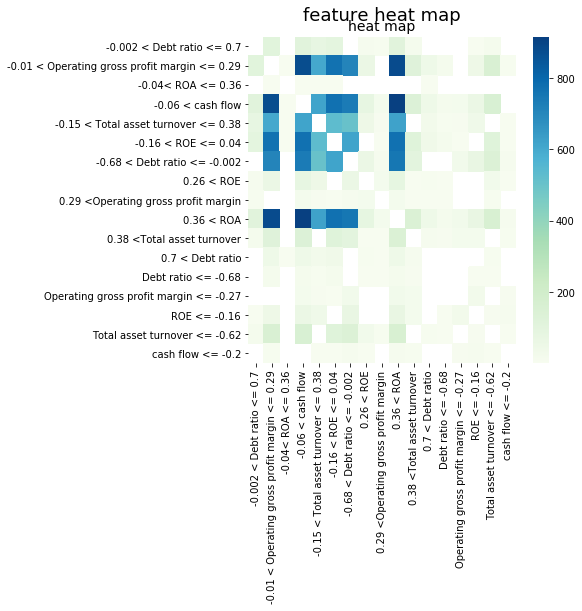

In [14]:
plt.figure(figsize=(6,6))
sns.heatmap(co_matrix_df,mask=co_matrix_df < 1,cmap='GnBu')
plt.title('heat map', size = 14)
plt.suptitle('feature heat map',x = 0.435,y=0.95, fontsize=18)

In [15]:
from matplotlib import pyplot as plt
import networkx as nx

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


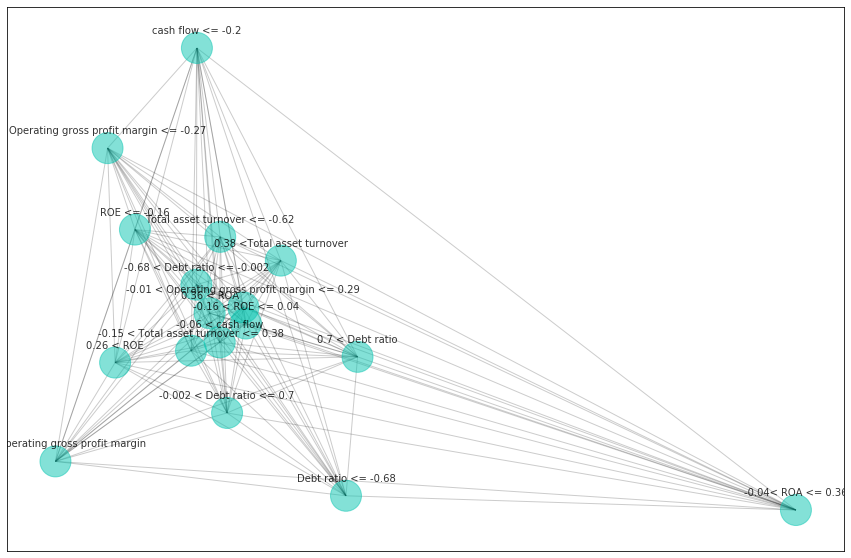

In [16]:
plt.figure(figsize=(15,10))
plt.rcParams['font.sans-serif'] = ['SimHei']   
plt.rcParams['font.family']='sans-serif'
g = nx.Graph()
g.add_weighted_edges_from(co_matrix_weight)
pos=nx.spring_layout(g)
nx.draw_networkx_nodes(g, pos, alpha=0.5,node_size=[val*60 for (node, val) in g.degree()], node_color='#08c5b1')
nx.draw_networkx_edges(g, pos, node_color='b', alpha=0.2)
 
for p in pos:  # raise text positions
     pos[p][1] = pos[p][1] + 0.03
nx.draw_networkx_labels(g, pos, font_size = 10, font_family='sans-serif', alpha=0.8)
#plt.title('stock info co-matrix', size = 10)
#plt.suptitle('AAA',x = 0.51,y=0.92, fontsize=20)
#plt.savefig("共線圖.png", dpi=100)
plt.show()   

In [17]:
co_matrix_weight_n = []
for each in co_matrix_weight:
    if each[2] > 600:
        co_matrix_weight_n.append(each)

In [18]:
edges = g.edges()
weights = [g[u][v]['weight'] for u,v in edges]

n_weights = []
for i in weights:
    n_weights.append((i-min(weights))/(max(weights)-min(weights)))

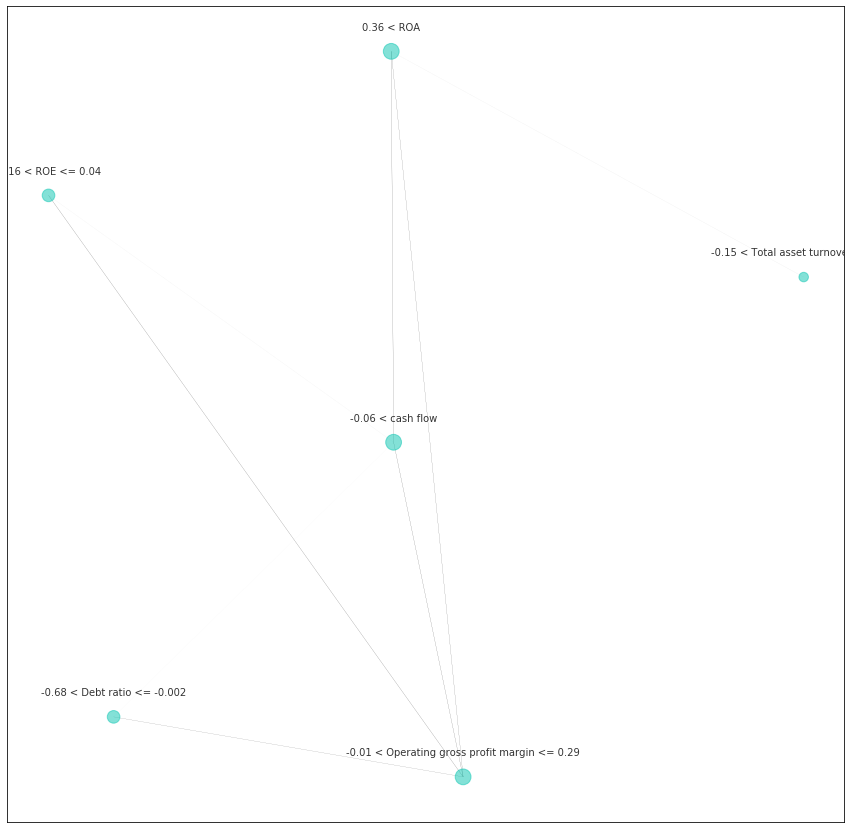

In [21]:
plt.figure(figsize=(15,15))
plt.rcParams['font.sans-serif'] = ['SimHei']   
plt.rcParams['font.family']='sans-serif'
g = nx.Graph()
g.add_weighted_edges_from(co_matrix_weight_n)
pos=nx.spring_layout(g)
nx.draw_networkx_nodes(g, pos, alpha=0.5,node_size=[val**2*10 for (node, val) in g.degree()], node_color='#08c5b1')
nx.draw_networkx_edges(g, pos, width=n_weights, node_color='b', alpha=1)
 
for p in pos:  # raise text positions
     pos[p][1] = pos[p][1] + 0.03
nx.draw_networkx_labels(g, pos, font_size = 10, font_family='sans-serif', alpha=0.8)
#plt.title('stock info co-matrix', size = 10)
#plt.suptitle('stock',x = 0.51,y=0.92, fontsize=20)
#plt.savefig("用詞共線圖_以每筆通聯紀錄為一句.png", dpi=100)
plt.show()

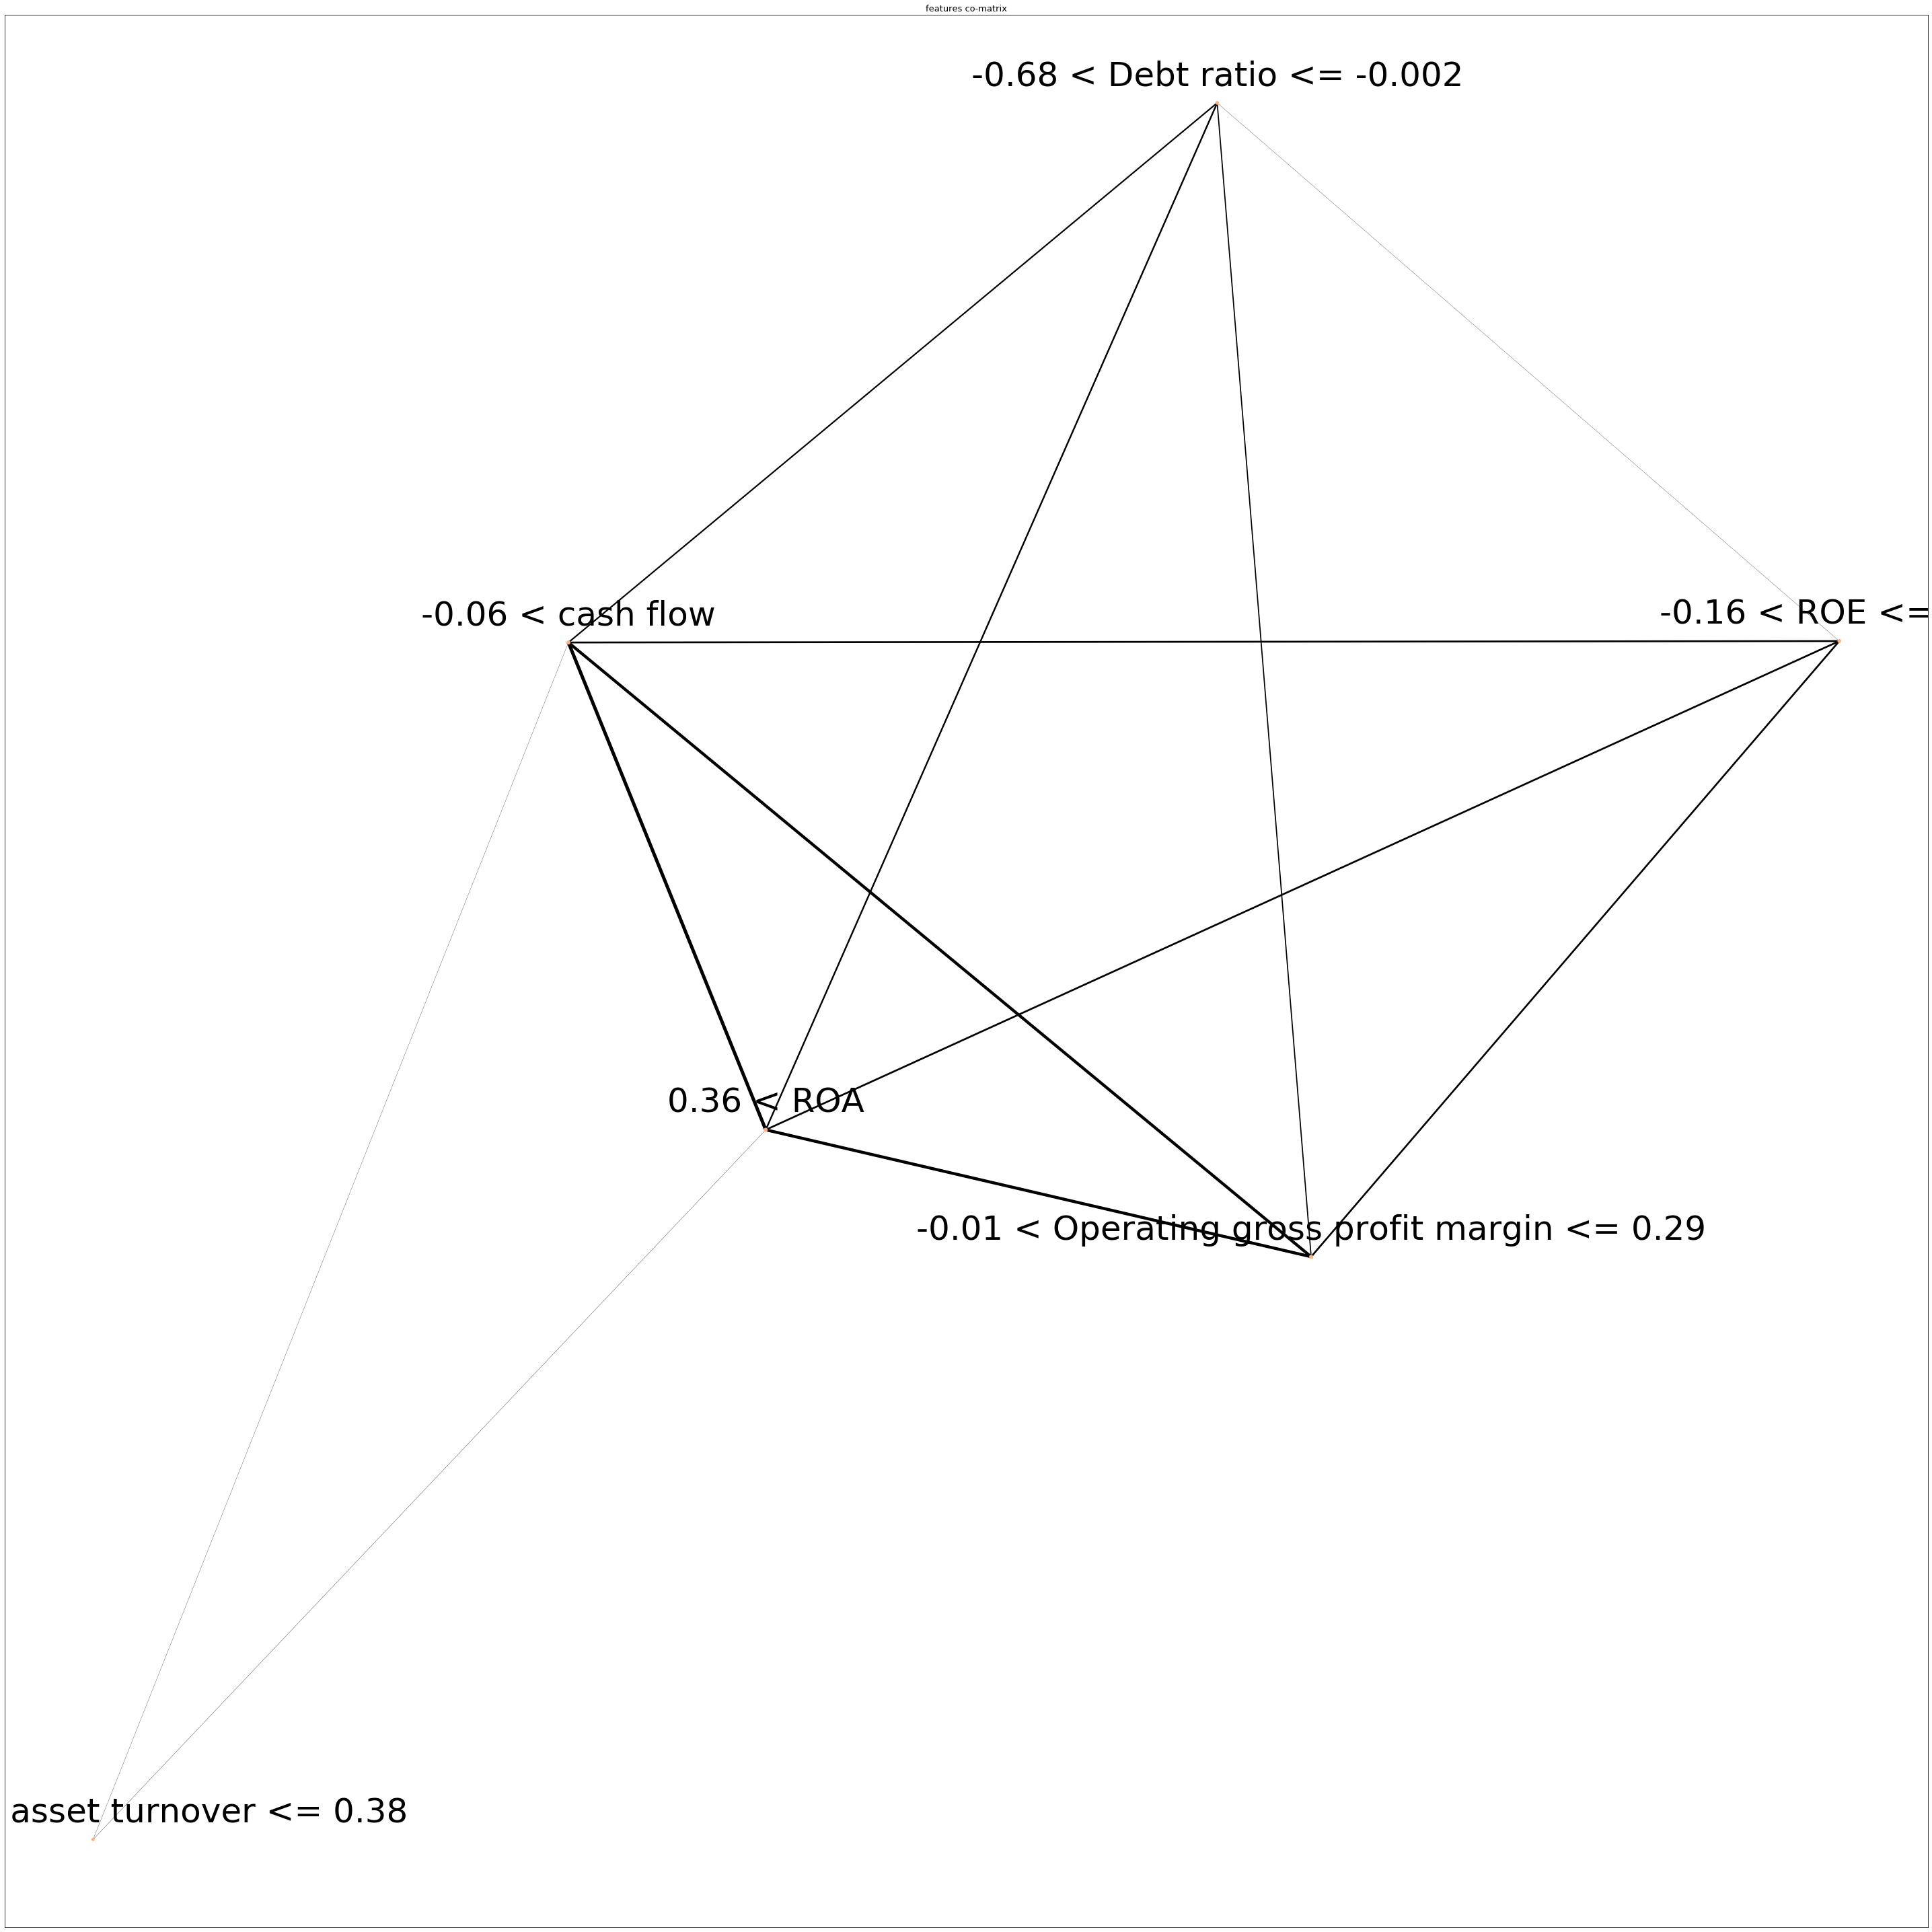

In [62]:
from matplotlib import pyplot as plt
import networkx as nx
plt.figure(figsize=(40,40))
plt.rcParams['font.family'] = "Noto Sans Mono CJK TC"

g = nx.Graph()
g.add_weighted_edges_from(w_new)
pos=nx.spring_layout(g)
nx.draw_networkx_nodes(g, pos, alpha=1,node_size=[val*5 for (node, val) in g.degree()], node_color='#ffb07c')
nx.draw_networkx_edges(g, pos, width=n_weights, alpha=1)

for p in pos:  
    pos[p][1] = pos[p][1] + 0.03

nx.draw_networkx_labels(g, pos, font_size = 50, font_family="Noto Sans Mono CJK TC")#, alpha=0.8)
plt.title('features co-matrix', size = 13)
plt.tight_layout()